**Data Set Description:** The Internet Sales Data Set is a collection of records in CSV format containing 60 attributes describing the Internet sales of the AdventureWorks Bicycle Company.   The leadership of AdventureWorks is interested in understanding the Intenet sales of the company to develop a strategy to grow its business.

**Analysis Task:** Using Google Colabs and Python code, complete an analysis of the company's Internet Sales, including summarizing reviews by year and product category. Make a recommendation regarding where leadership should focus strategy to grow internet sales. Explain your recommendation. Summarize the results of your analysis in a leadership report.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
from io import StringIO
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import date as dt
import os
if not os.path.exists('output_graphs'):
    os.makedirs('output_graphs')
from scipy import stats


#set precison of floating point in Pandas
pd.set_eng_float_format(accuracy=3, use_eng_prefix=True)
pd.set_option('display.float_format', lambda x: '%.2f' % x) #set precison of floating point in Pandas

In [ ]:
%pushd "/content/drive/MyDrive/MSSP6070/Modules/Week07/data/"

/content/drive/MyDrive/MSSP6070/Modules/Week07/data


['/content/drive/My Drive/MSSP6070/Modules/Week07/data', '/content']

In [ ]:
internet_sales = pd.read_csv('InternetSales.csv', parse_dates=['BirthDate','DateFirstPurchase','OrderDate','DueDate','ShipDate'],
                   low_memory=False)
internet_sales

,ID,CustomerKey,GeographyKey,City,CountryRegionCode,EnglishCountryRegionName,CustomerAlternateKey,Title,FirstName,MiddleName,...,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight,CarrierTrackingNumber,CustomerPONumber,OrderDate,DueDate,ShipDate
0,0,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,...,1912.15,1912.15,3399.99,272.00,85.00,NaN,NaN,2011-01-19,2011-01-31,2011-01-26
1,1,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,...,1265.62,1265.62,2319.99,185.60,58.00,NaN,NaN,2013-01-18,2013-01-30,2013-01-25
2,2,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,...,8.22,8.22,21.98,1.76,0.55,NaN,NaN,2013-01-18,2013-01-30,2013-01-25
3,3,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,...,1481.94,1481.94,2384.07,190.73,59.60,NaN,NaN,2013-05-03,2013-05-15,2013-05-10
4,4,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,...,10.84,10.84,28.99,2.32,0.72,NaN,NaN,2013-05-03,2013-05-15,2013-05-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60393,60393,29480,248,London,GB,United Kingdom,AW00029480,NaN,Nina,W,...,13.09,13.09,34.99,2.80,0.87,NaN,NaN,2013-07-17,2013-07-29,2013-07-24
60394,60394,29480,248,London,GB,United Kingdom,AW00029480,NaN,Nina,W,...,6.92,6.92,8.99,0.72,0.22,NaN,NaN,2013-07-17,2013-07-29,2013-07-24
60395,60395,29481,120,Hof,DE,Germany,AW00029481,NaN,Ivan,NaN,...,1898.09,1898.09,3374.99,270.00,84.37,NaN,NaN,2011-08-13,2011-08-25,2011-08-20
60396,60396,29482,179,Saint Ouen,FR,France,AW00029482,NaN,Clayton,NaN,...,1105.81,1105.81,2049.10,163.93,51.23,NaN,NaN,2012-09-18,2012-09-30,2012-09-25


In [ ]:
internet_sales.columns.tolist()

['ID',
 'CustomerKey',
 'GeographyKey',
 'City',
 'CountryRegionCode',
 'EnglishCountryRegionName',
 'CustomerAlternateKey',
 'Title',
 'FirstName',
 'MiddleName',
 'LastName',
 'NameStyle',
 'BirthDate',
 'MaritalStatus',
 'Suffix',
 'Gender',
 'EmailAddress',
 'YearlyIncome',
 'TotalChildren',
 'NumberChildrenAtHome',
 'EnglishEducation',
 'SpanishEducation',
 'FrenchEducation',
 'EnglishOccupation',
 'SpanishOccupation',
 'FrenchOccupation',
 'HouseOwnerFlag',
 'NumberCarsOwned',
 'AddressLine1',
 'AddressLine2',
 'Phone',
 'DateFirstPurchase',
 'CommuteDistance',
 'ProductKey',
 'EnglishProductName',
 'OrderDateKey',
 'DueDateKey',
 'ShipDateKey',
 'CustomerKey.1',
 'PromotionKey',
 'CurrencyKey',
 'SalesTerritoryKey',
 'SalesOrderNumber',
 'SalesOrderLineNumber',
 'RevisionNumber',
 'OrderQuantity',
 'UnitPrice',
 'ExtendedAmount',
 'UnitPriceDiscountPct',
 'DiscountAmount',
 'ProductStandardCost',
 'TotalProductCost',
 'SalesAmount',
 'TaxAmt',
 'Freight',
 'CarrierTrackingNumber

In [ ]:
#Add date parts to the dataframe for future use in the analysis
internet_sales = internet_sales.assign(orderyear = internet_sales['OrderDate'].dt.year)
internet_sales = internet_sales.assign(orderquarter = internet_sales['OrderDate'].dt.quarter)
internet_sales = internet_sales.assign(ordermonth = internet_sales['OrderDate'].dt.month)
internet_sales = internet_sales.assign(orderday = internet_sales['OrderDate'].dt.day)
internet_sales = internet_sales.assign(daynumber = internet_sales['orderyear']+internet_sales['ordermonth']+internet_sales['orderday'])

#Determine quarterly sales.  Notice 2010 and 2014 are incomplete years.
internet_sales.groupby(['orderyear','orderquarter']).agg({'SalesAmount':'sum'},as_index=True )

SalesAmount
orderyear orderquarter             
2010      4                43421.04
2011      1              1421357.48
          2              1801595.14
          3              1814387.99
          4              2038185.32
2012      1              1375841.32
          2              1314373.65
          3              1454653.06
          4              1697617.17
2013      1              2678946.04
          2              3973793.48
          3              4370237.06
          4              5328573.76
2014      1                45694.72

In [ ]:
internet_sales['OrderDate'] = pd.to_datetime(internet_sales['OrderDate'])
internet_sales['orderyear'] = internet_sales['OrderDate'].dt.year
internet_sales.groupby('orderyear')['SalesAmount'].sum().reset_index()

,orderyear,SalesAmount
0,2010,43421.04
1,2011,7075525.93
2,2012,5842485.20
3,2013,16351550.34
4,2014,45694.72


In [ ]:
#Drop outliers in 2010 and 2014 to have valid sales: December 2010 and January 2014 were short years.
internet_sales.query('"2010-12-31" < OrderDate' , inplace=True)
internet_sales.query('OrderDate < "2013-12-29"', inplace=True)
internet_sales.groupby(['orderyear','orderquarter']).agg({'SalesAmount':'sum'},as_index=True )

SalesAmount
orderyear orderquarter             
2011      1              1421357.48
          2              1801595.14
          3              1814387.99
          4              2038185.32
2012      1              1375841.32
          2              1314373.65
          3              1454653.06
          4              1697617.17
2013      1              2678946.04
          2              3973793.48
          3              4370237.06
          4              5323427.85

What are the Internet sales of AdventureWorks by year for each Country Region?

In [ ]:
internet_sales['orderyear'] = pd.to_datetime(internet_sales['orderyear'])
yearly_sales = internet_sales.groupby([internet_sales['OrderDate'].dt.year, 'EnglishCountryRegionName'])['SalesAmount'].sum().reset_index()
yearly_sales.columns = ['Year', 'Region', 'TotalSales']
yearly_sales = yearly_sales.sort_values(by=['Region', 'Year'], ascending=[True, True])
yearly_sales

,Year,Region,TotalSales
0,2011,Australia,2563732.25
6,2012,Australia,2128407.46
12,2013,Australia,4338716.87
1,2011,Canada,571571.80
7,2012,Canada,307604.52
13,2013,Canada,1084236.57
2,2011,France,410845.33
8,2012,France,648065.54
14,2013,France,1578214.91
3,2011,Germany,520500.16


In [ ]:
internet_sales['orderyear'] = internet_sales['OrderDate'].dt.year
result = internet_sales.groupby(['orderyear', 'EnglishCountryRegionName'])['SalesAmount'].sum().reset_index()
max_sales_by_year = result.groupby('orderyear')['SalesAmount'].idxmax()
regions_with_most_sales = result.loc[max_sales_by_year]
regions_with_most_sales.columns = ['Year', 'Region', 'TotalSales']
print(regions_with_most_sales)

    Year         Region  TotalSales
0   2011      Australia  2563732.25
6   2012      Australia  2128407.46
17  2013  United States  5460187.20


In [ ]:
internet_sales['orderyear'] = internet_sales['OrderDate'].dt.year
result = internet_sales.groupby(['orderyear', 'EnglishCountryRegionName'])['SalesAmount'].sum().reset_index()
min_sales_by_year = result.groupby('orderyear')['SalesAmount'].idxmin()
regions_with_least_sales = result.loc[min_sales_by_year]
regions_with_least_sales.columns = ['Year', 'Region', 'TotalSales']
print(regions_with_least_sales)

    Year  Region  TotalSales
2   2011  France   410845.33
7   2012  Canada   307604.52
13  2013  Canada  1084236.57


In [ ]:
grouped = yearly_sales.groupby('Region')
for region, data in grouped:
    plt.figure()
    plt.bar(data['Year'], data['TotalSales'])
    plt.title(f'Total Sales by Year for {region}')
    plt.xlabel('Year')
    plt.ylabel('Total Sales')
    plt.xticks(data['Year'])
    filename = f'output_graphs/total_sales_{region}.png'
    plt.savefig(filename)
    plt.close()

plt.show()


Generate summary statistics including min, max, and standard deviation for Yearly Income, Gender by Country Regions.  

In [ ]:
income_stats = internet_sales.groupby('EnglishCountryRegionName')['YearlyIncome'].describe()
income_stats.to_csv('output_graphs/income_stats_by_region.csv')

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='EnglishCountryRegionName', y='YearlyIncome', data=internet_sales)
plt.title('Boxplots of YearlyIncome by Region')
plt.ylabel('Yearly Income')
filename = 'output_graphs/yearly_income_by_region.png'
plt.savefig(filename)
plt.close()
plt.show()

In [ ]:
internet_sales['Gender'].value_counts(normalize=True)

M   0.50
F   0.50
Name: Gender, dtype: float64

In [ ]:
internet_sales.groupby('EnglishCountryRegionName')['Gender'].value_counts(normalize=True).unstack(fill_value=0)

Gender,F,M
EnglishCountryRegionName,,
Australia,0.50,0.50
Canada,0.48,0.52
France,0.50,0.50
Germany,0.50,0.50
United Kingdom,0.49,0.51
United States,0.50,0.50


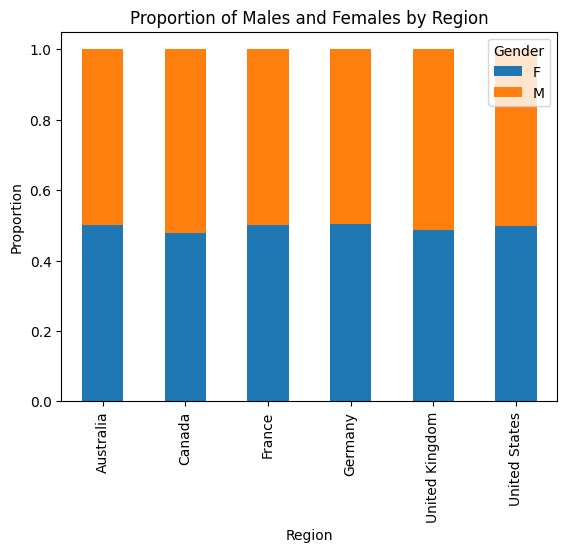

In [ ]:
proportions = internet_sales.groupby('EnglishCountryRegionName')['Gender'].value_counts(normalize=True).unstack(fill_value=0)

proportions.plot(kind='bar', stacked=True)
plt.title('Proportion of Males and Females by Region')
plt.xlabel('Region')
plt.ylabel('Proportion')
plt.legend(title='Gender', loc='upper right')
filename = 'output_graphs/gender_by_region.png'
plt.savefig(filename)
plt.show()

In [ ]:
internet_sales.groupby('EnglishCountryRegionName')['MaritalStatus'].value_counts(normalize=True).unstack(fill_value=0)

MaritalStatus,M,S
EnglishCountryRegionName,,
Australia,0.52,0.48
Canada,0.60,0.40
France,0.49,0.51
Germany,0.52,0.48
United Kingdom,0.56,0.44
United States,0.57,0.43


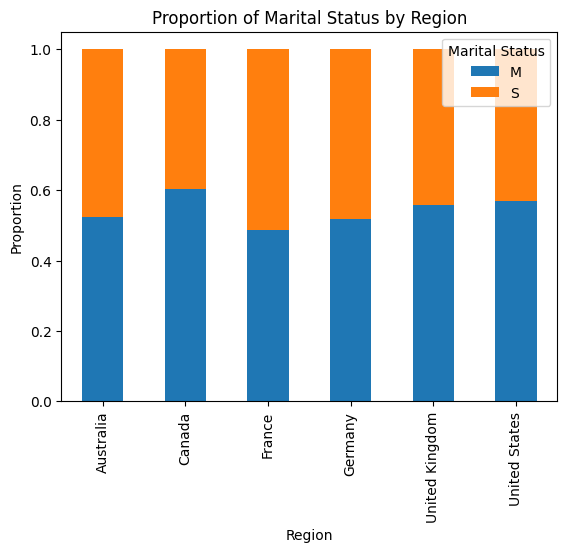

In [ ]:
proportions = internet_sales.groupby('EnglishCountryRegionName')['MaritalStatus'].value_counts(normalize=True).unstack(fill_value=0)

proportions.plot(kind='bar', stacked=True)
plt.title('Proportion of Marital Status by Region')
plt.xlabel('Region')
plt.ylabel('Proportion')
plt.legend(title='Marital Status', loc='upper right')
filename = 'output_graphs/marital_status_by_region.png'
plt.savefig(filename)
plt.show()

In [ ]:
internet_sales.groupby('EnglishCountryRegionName')['TotalChildren'].value_counts(normalize=True).unstack(fill_value=0)

TotalChildren,0,1,2,3,4,5
EnglishCountryRegionName,,,,,,
Australia,0.38,0.16,0.23,0.08,0.05,0.10
Canada,0.24,0.17,0.21,0.08,0.21,0.09
France,0.30,0.20,0.21,0.10,0.09,0.10
Germany,0.28,0.22,0.19,0.17,0.10,0.04
United Kingdom,0.26,0.28,0.14,0.16,0.13,0.03
United States,0.24,0.19,0.21,0.13,0.15,0.08


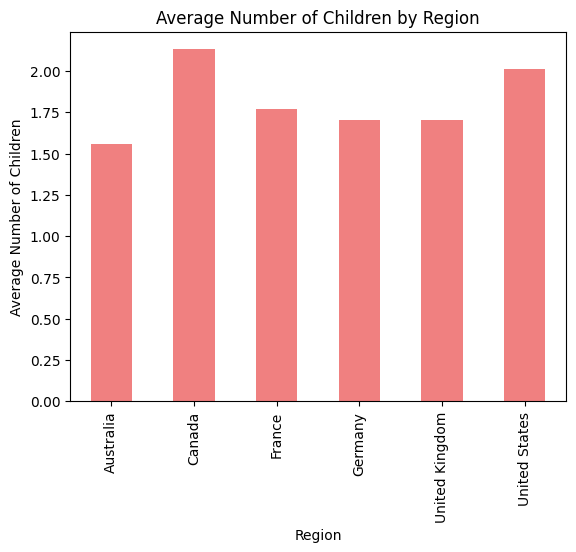

In [ ]:
average_children_by_region = internet_sales.groupby('EnglishCountryRegionName')['TotalChildren'].mean()

average_children_by_region.plot(kind='bar', color='lightcoral')
plt.title('Average Number of Children by Region')
plt.xlabel('Region')
plt.ylabel('Average Number of Children')
filename = 'output_graphs/totalchildren_by_region.png'
plt.savefig(filename)
plt.show()

In [ ]:
internet_sales.groupby(['EnglishCountryRegionName', 'Gender'])['SalesAmount'].sum().reset_index()

,EnglishCountryRegionName,Gender,SalesAmount
0,Australia,F,4620157.48
1,Australia,M,4410699.09
2,Canada,F,1006133.74
3,Canada,M,957279.15
4,France,F,1267014.55
5,France,M,1370111.23
6,Germany,F,1538080.46
7,Germany,M,1352627.05
8,United Kingdom,F,1612206.85
9,United Kingdom,M,1774584.85


What is the average price of the product category that generates the most sales?

In [ ]:
category_sales = internet_sales.groupby('EnglishProductName')['SalesAmount'].sum()
category_data = pd.DataFrame(category_sales)
category_data['TotalOrderQuantity'] = internet_sales.groupby('EnglishProductName')['OrderQuantity'].sum()
category_data['AveragePrice'] = category_data['SalesAmount'] / category_data['TotalOrderQuantity']
top_categories = category_data.sort_values(by='AveragePrice', ascending=False).head(10)
top_categories.reset_index(inplace=True)
print("Top 5 Product Categories with Highest Average Prices:")
print(top_categories[['EnglishProductName', 'AveragePrice']])

Top 5 Product Categories with Highest Average Prices:
        EnglishProductName  AveragePrice
0         Road-150 Red, 62       3578.27
1         Road-150 Red, 44       3578.27
2         Road-150 Red, 48       3578.27
3         Road-150 Red, 52       3578.27
4         Road-150 Red, 56       3578.27
5  Mountain-100 Silver, 42       3399.99
6  Mountain-100 Silver, 38       3399.99
7  Mountain-100 Silver, 48       3399.99
8  Mountain-100 Silver, 44       3399.99
9   Mountain-100 Black, 48       3374.99


In [ ]:
product_sales = internet_sales.groupby('EnglishProductName')['SalesAmount'].sum()
top_product = product_sales.idxmax()
highest_sales = product_sales.max()
print(f"The product with the highest overall sales is '{top_product}' with total sales of ${highest_sales:.2f}")

The product with the highest overall sales is 'Mountain-200 Black, 46' with total sales of $1373469.55


In [ ]:
internet_sales['OrderDate'] = pd.to_datetime(internet_sales['OrderDate'])
internet_sales['OrderYear'] = internet_sales['OrderDate'].dt.year
yearly_product_sales = internet_sales.groupby(['OrderYear', 'EnglishProductName'])['SalesAmount'].sum().reset_index()
yearly_product_sales = yearly_product_sales.sort_values(by=['OrderYear', 'SalesAmount'], ascending=[True, False])
top_selling_products = yearly_product_sales.groupby('OrderYear').head(5)
worst_selling_products = yearly_product_sales.groupby('OrderYear').tail(5)

print(top_selling_products)
print(worst_selling_products)

     OrderYear       EnglishProductName  SalesAmount
12        2011         Road-150 Red, 48   1198720.45
15        2011         Road-150 Red, 62   1195142.18
13        2011         Road-150 Red, 52   1077059.27
14        2011         Road-150 Red, 56   1052011.38
11        2011         Road-150 Red, 44   1001915.60
56        2012   Mountain-200 Black, 46    423589.58
55        2012   Mountain-200 Black, 42    392361.32
72        2012         Road-250 Red, 48    388492.65
69        2012       Road-250 Black, 52    378195.67
59        2012  Mountain-200 Silver, 46    377744.08
142       2013   Mountain-200 Black, 42    970780.77
144       2013  Mountain-200 Silver, 38    967435.83
141       2013   Mountain-200 Black, 38    947830.87
143       2013   Mountain-200 Black, 46    947830.87
146       2013  Mountain-200 Silver, 46    923356.02
     OrderYear       EnglishProductName  SalesAmount
18        2011       Road-250 Black, 58      2181.56
10        2011  Mountain-200 Silver, 42      2

Does owning a home make a difference in sales? Explain your analysis.

In [ ]:
filtered_internet_sales = internet_sales[(internet_sales['OrderYear'] >= 2011) & (internet_sales['OrderYear'] <= 2013)]
average_sales_by_homeowner = filtered_internet_sales.groupby('HouseOwnerFlag')['SalesAmount'].mean().reset_index()
own_home = filtered_internet_sales[filtered_internet_sales['HouseOwnerFlag'] == 1]
rent_home = filtered_internet_sales[filtered_internet_sales['HouseOwnerFlag'] == 0]
t_stat, p_value = stats.ttest_ind(own_home['SalesAmount'], rent_home['SalesAmount'], equal_var=False)

# Print the table of average SalesAmount by HomeOwnerFlag
print("Average SalesAmount by HomeOwnerFlag:")
print(average_sales_by_homeowner)

# Print the t-test results
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

# Determine if the difference is statistically significant
alpha = 0.05  # Significance level
if p_value < alpha:
    print("There is a statistically significant difference in sales between home owners and renters for years 2011-2013.")
else:
    print("There is no statistically significant difference in sales between home owners and renters for years 2011-2013.")

Average SalesAmount by HomeOwnerFlag:
   HouseOwnerFlag  SalesAmount
0               0       496.66
1               1       505.90
T-Statistic: 1.0985386647946778
P-Value: 0.27197694099863085
There is no statistically significant difference in sales between home owners and renters for years 2011-2013.


In [ ]:
import statsmodels.api as sm

filtered_internet_sales = internet_sales[(internet_sales['OrderYear'] >= 2011) & (internet_sales['OrderYear'] <= 2013)]
filtered_internet_sales = pd.get_dummies(filtered_internet_sales, columns=['EnglishCountryRegionName', 'MaritalStatus', 'OrderYear'], drop_first=True)

# Define the variables
X = filtered_internet_sales[['HouseOwnerFlag', 'YearlyIncome'] + list(filtered_internet_sales.columns[filtered_internet_sales.columns.str.startswith('EnglishCountryRegionName_')]) + list(filtered_internet_sales.columns[filtered_internet_sales.columns.str.startswith('OrderYear_')]) + list(filtered_internet_sales.columns[filtered_internet_sales.columns.str.startswith('MaritalStatus_')])]
X = sm.add_constant(X)
y = filtered_internet_sales['SalesAmount']

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            SalesAmount   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     4904.
Date:                Sat, 04 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:53:46   Log-Likelihood:            -4.6306e+05
No. Observations:               58175   AIC:                         9.261e+05
Df Residuals:                   58164   BIC:                         9.262e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------